In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import mplhep as hep
hep.style.use("CMS")
plt.rcParams['font.size'] = 14.0
from matplotlib.colors import Normalize, LogNorm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
class histLoader:
    def __init__(self,path):
        self.path = path
        self.names = []
        for f in os.listdir(path):
            if '.coffea' in f:
                self.names.append(f.split(".")[0])
    def load(self,hname):
        return util.load(f"{self.path}/{hname}.coffea")

class histContainer:
    def __init__(self,path):
        self.histos, self.metadata = util.load(path)
    def load(self,hname):
        return self.histos[hname]
    
def hplot(h,overlay):
    axes = h.axes
    targ = None
    for a in axes:
        if a.name == overlay:
            targ = a
    if targ is None:
        print("can't find overlay axis!")
        return

In [12]:
#histos = histContainer("genPlots.coffea")
histos = histLoader("../../outputs/sig/signal_v4_2018_aEM_histos_noXcleanVars_old//")

# Summary Efficiency Plots

In [8]:
outD = "plots_noXcleanInfo/recoEfficiency/summary/"
os.makedirs(outD,exist_ok=True)

In [ ]:
def make1dSummaryEff(hm,hg,hmsel,hgsel,cutX,outName,outD,mtypes,labels,title,xlabel,cmap={"R":"C3","L":"C0","Both":"C2"}):
    xcut = complex(f'{cutX}j')

    hm = histos.load("match_ele_gen_pt")[hmsel][:,:xcut]
    hg = histos.load("gen_ele_pt")[hgsel][:xcut]
    
    num_gen = hg.values()
    fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
    centers = hg.axes[0].centers
    width = hg.axes[0].widths[0]
    
    plt.figure(figsize=(8,6))
    bottom = np.zeros_like(centers)
    for i in range(len(mtypes)):
        plt.bar(centers,fracs[mt[i]],width,label=labels[i],color=cmap[mt[i]],bottom=bottom)
        bottom += fracs[mt[i]]
    
    plt.ylabel("Fraction Reconstructed & Matched")
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylim([0,1])
    plt.legend(fontsize=16)
    plt.grid()
    plt.savefig(f"{outD}/{outName}.pdf")

## Efficiency by $p_T$

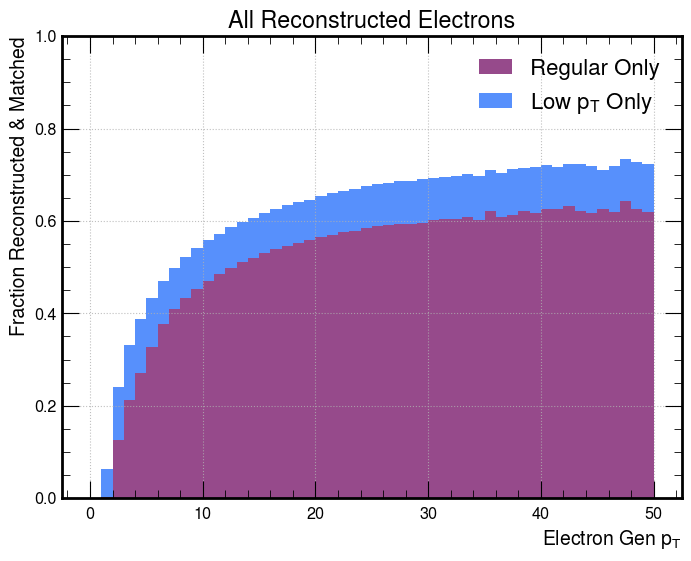

In [9]:
pt_cut = complex('50j')

hm = histos.load("match_ele_gen_pt")[{"cut":"no_presel","samp":sum,'passID':sum}][:,:pt_cut]
hg = histos.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
mtypes = ["R","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/allSamples_recoEff_by_pt.pdf")

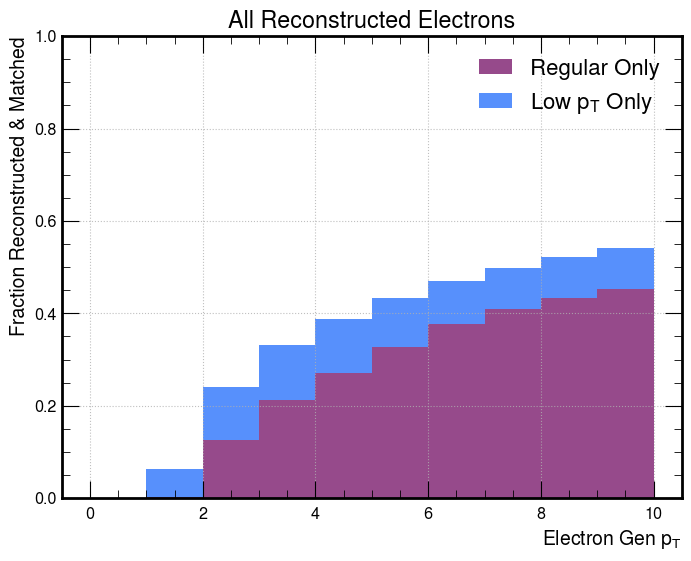

In [18]:
pt_cut = complex('10j')

hm = histos.load("match_ele_gen_pt")[{"cut":"no_presel","samp":sum,'passID':sum}][:,:pt_cut]
hg = histos.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
mtypes = ["R","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/allSamples_recoEff_by_pt_0to10.pdf")

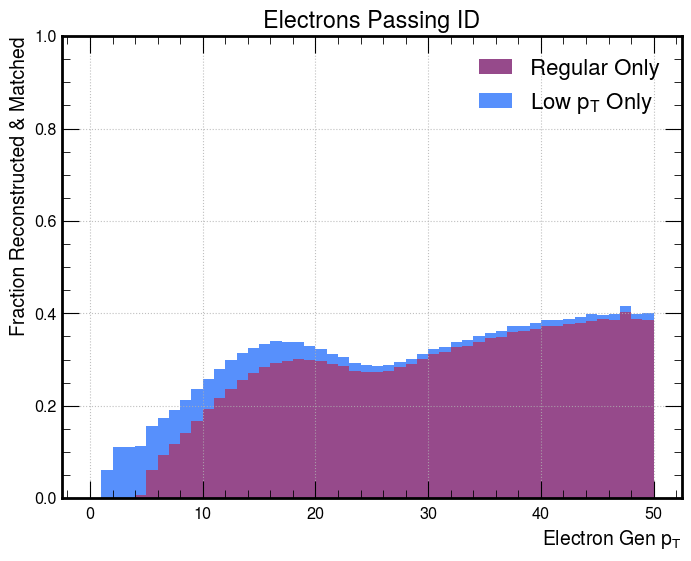

In [19]:
pt_cut = complex('50j')

hm = histos.load("match_ele_gen_pt")[{"cut":"no_presel","samp":sum,'passID':1}][:,:pt_cut]
hg = histos.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
mtypes = ["R","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_passID.pdf")

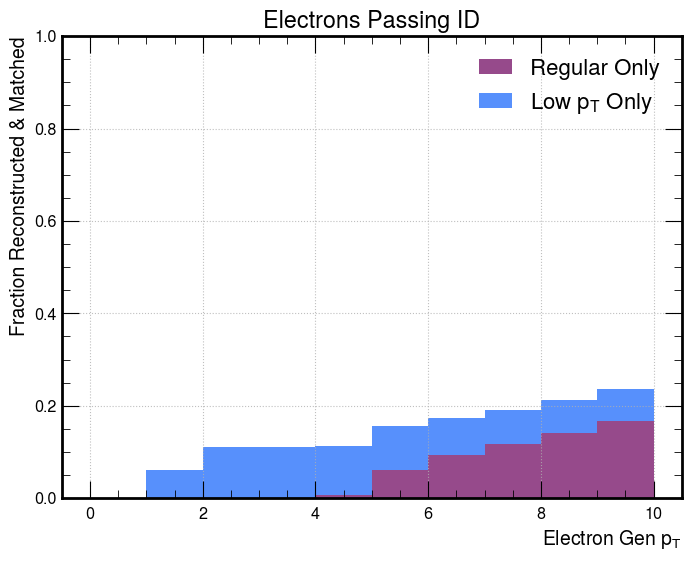

In [20]:
pt_cut = complex('10j')

hm = histos.load("match_ele_gen_pt")[{"cut":"no_presel","samp":sum,'passID':1}][:,:pt_cut]
hg = histos.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
mtypes = ["R","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_passID_0to10.pdf")

## Efficiency by $L_{xy}$

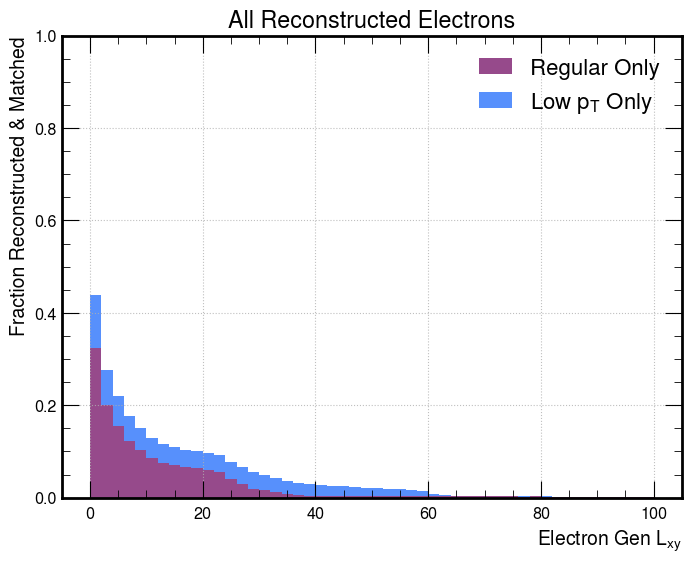

In [22]:
hm = histos.load("match_ele_gen_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}][:,::2j]
hg = histos.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}][::2j]
mtypes = ["R","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy.pdf")

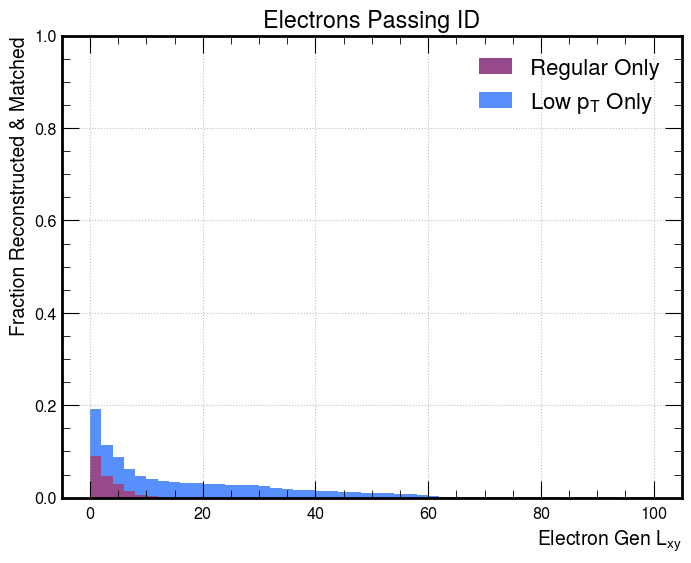

In [24]:
hm = histos.load("match_ele_gen_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}][:,::2j]
hg = histos.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}][::2j]
mtypes = ["R","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_passID.pdf")

## $p_T$ effs in Lxy bins

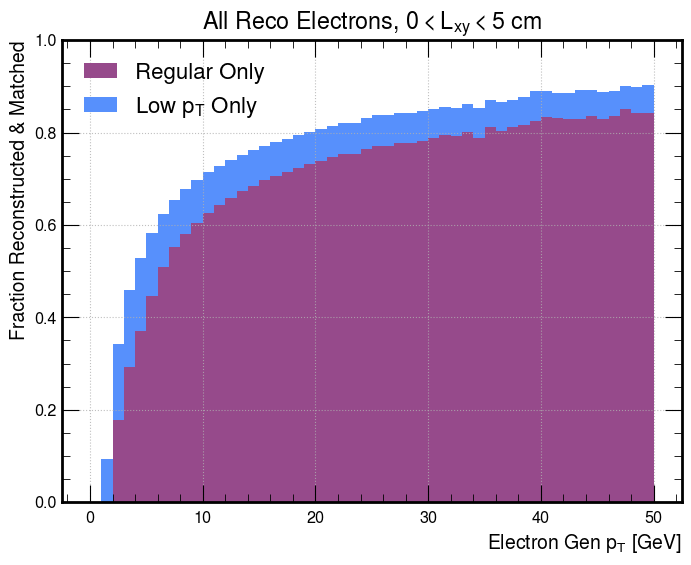

In [26]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 0j
lxyhi = 5j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy0to5.pdf")

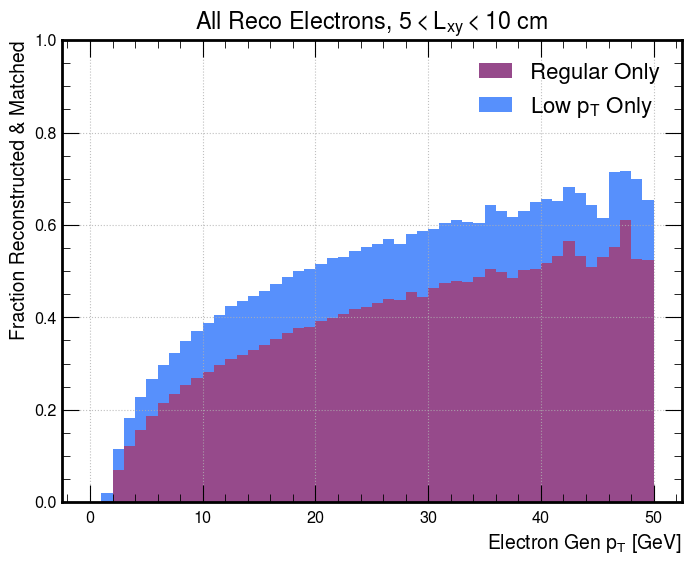

In [27]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 5j
lxyhi = 10j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy5to10.pdf")

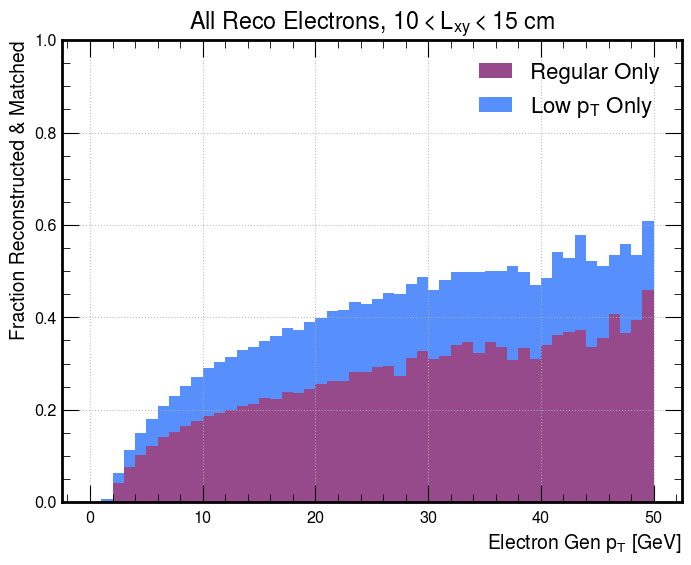

In [28]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 10j
lxyhi = 15j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy10to15.pdf")

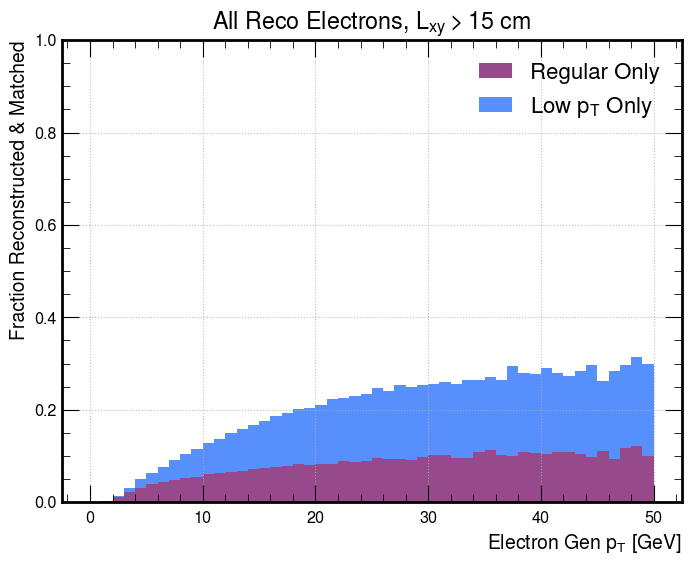

In [29]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 15j

hm = hm[:,ptlo:pthi,lxylo::sum]
hg = hg[ptlo:pthi,lxylo::sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $L_{{xy}} > {lxylo.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy15toInf.pdf")

## $L_{xy}$ Effs in $p_T$ bins

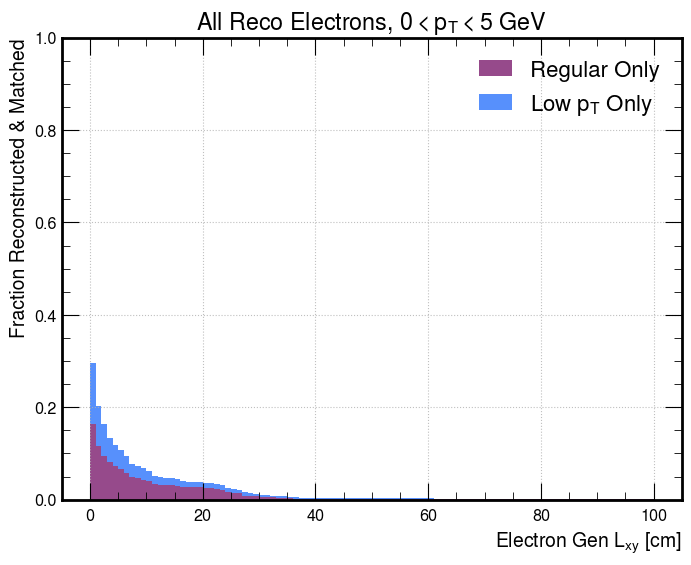

In [30]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 5j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt0to5.pdf")

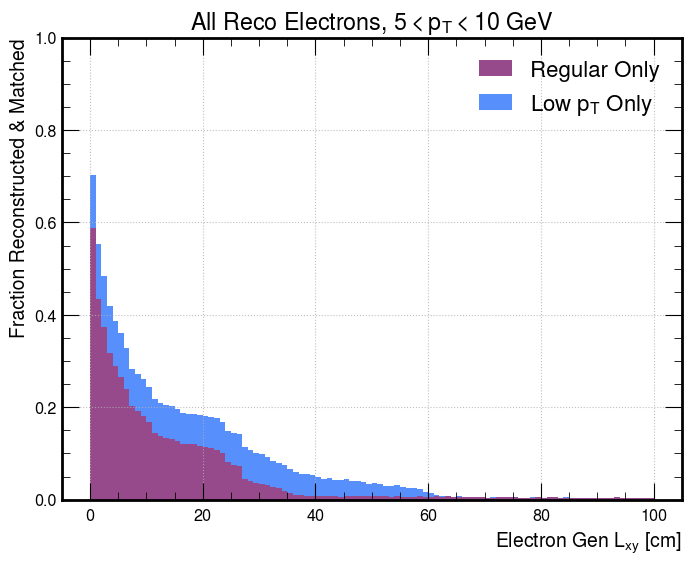

In [31]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 5j
pthi = 10j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt5to10.pdf")

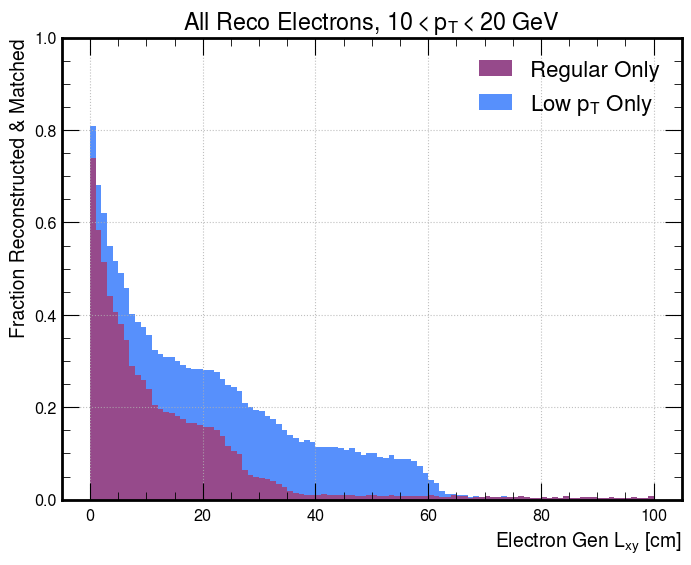

In [32]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 10j
pthi = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt10to20.pdf")

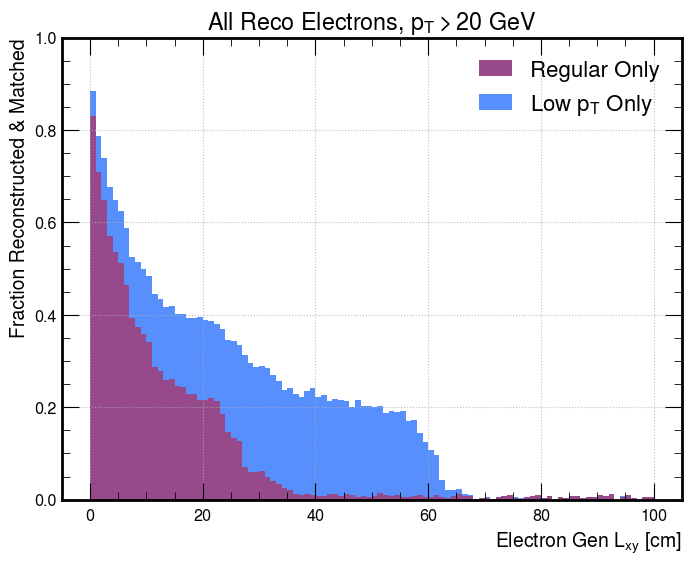

In [33]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo::sum,lxylo:lxyhi]
hg = hg[ptlo::sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $p_T > {ptlo.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt20toInf.pdf")

## $p_T$ effs in Lxy bins - pass ID

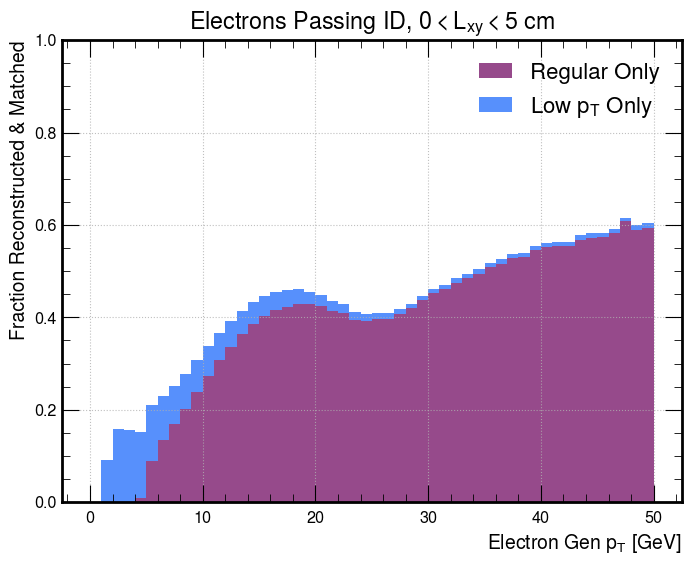

In [34]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 0j
lxyhi = 5j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy0to5_passID.pdf")

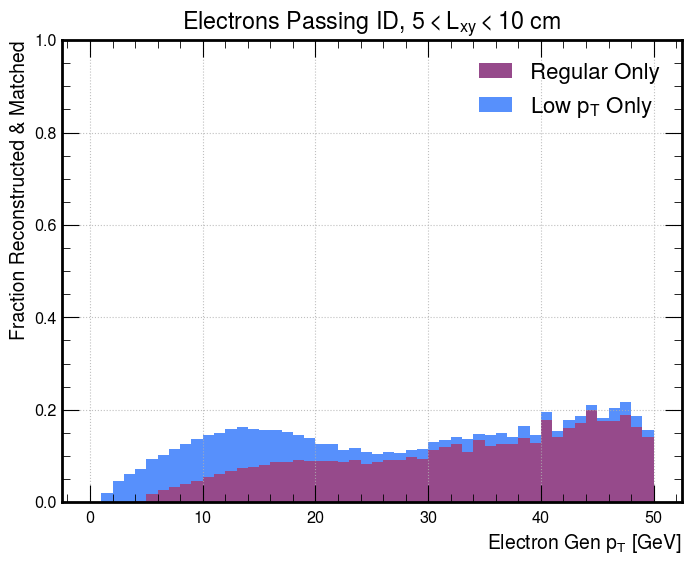

In [35]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 5j
lxyhi = 10j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy5to10_passID.pdf")

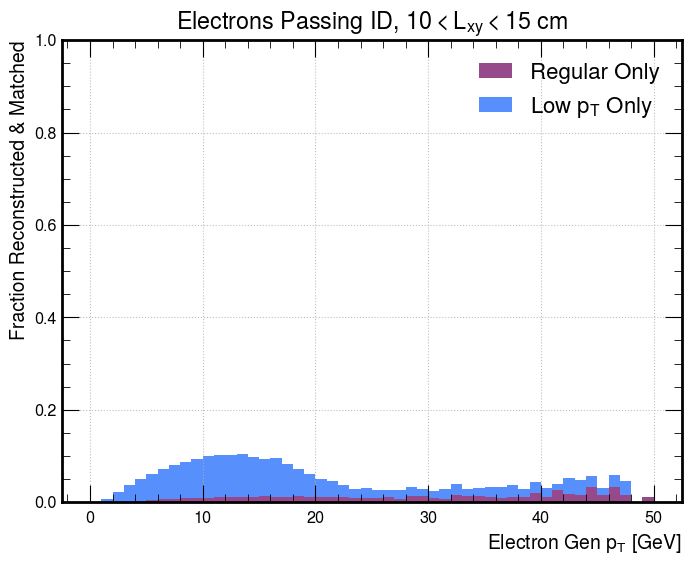

In [36]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 10j
lxyhi = 15j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy10to15_passID.pdf")

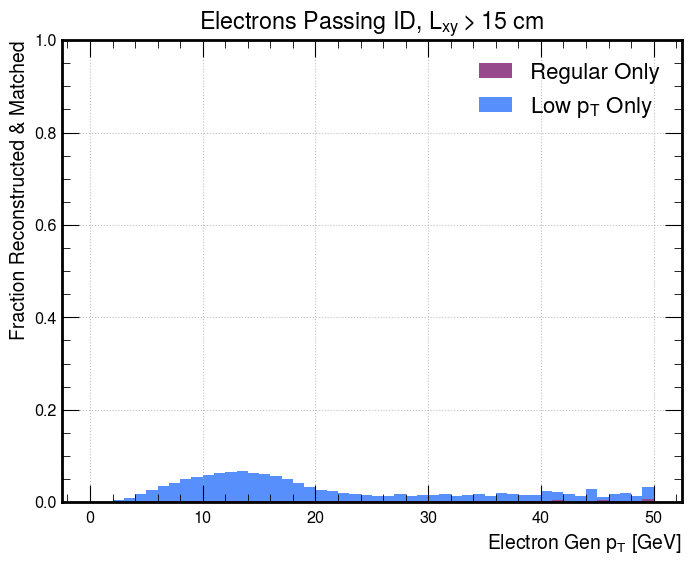

In [37]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 15j

hm = hm[:,ptlo:pthi,lxylo::sum]
hg = hg[ptlo:pthi,lxylo::sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, $L_{{xy}} > {lxylo.imag:.0f}$ cm")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_lxy15toInf_passID.pdf")

## $L_{xy}$ Effs in $p_T$ bins - passID

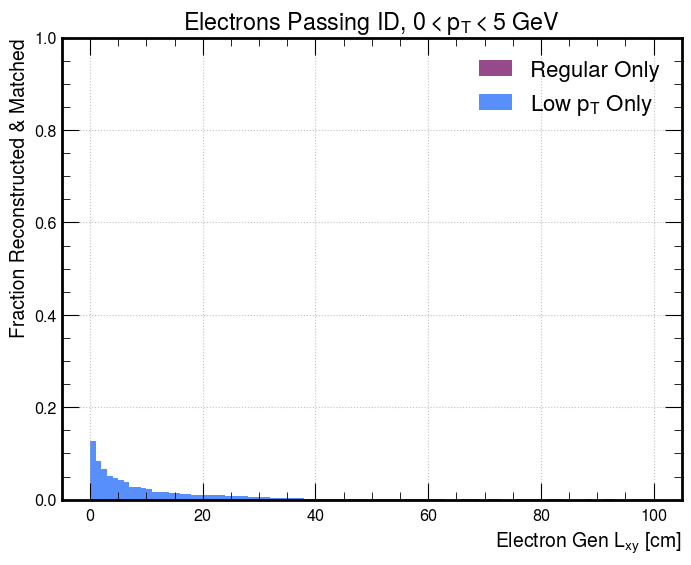

In [38]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 5j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt0to5_passID.pdf")

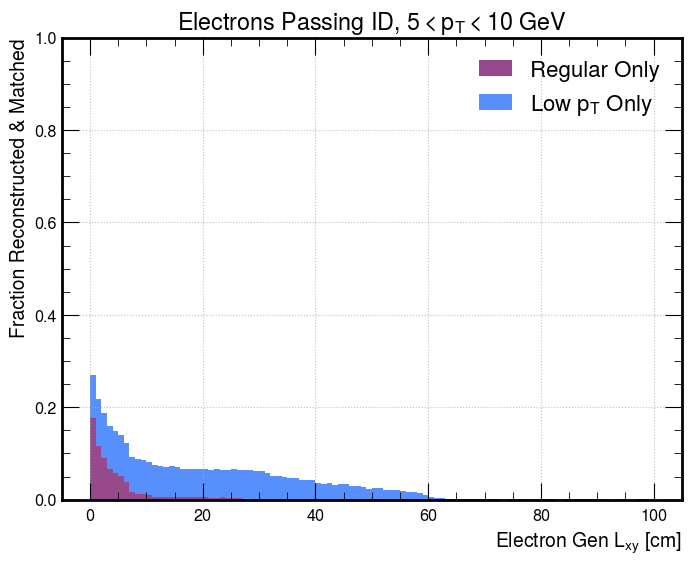

In [39]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 5j
pthi = 10j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt5to10_passID.pdf")

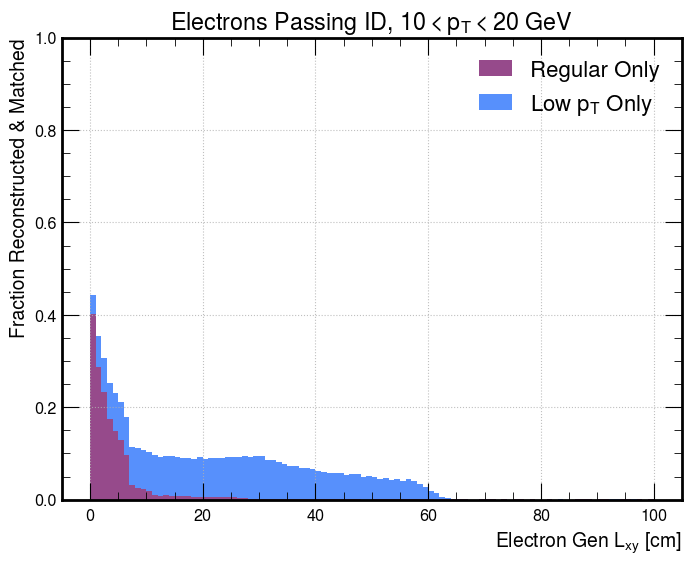

In [40]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 10j
pthi = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt10to20_passID.pdf")

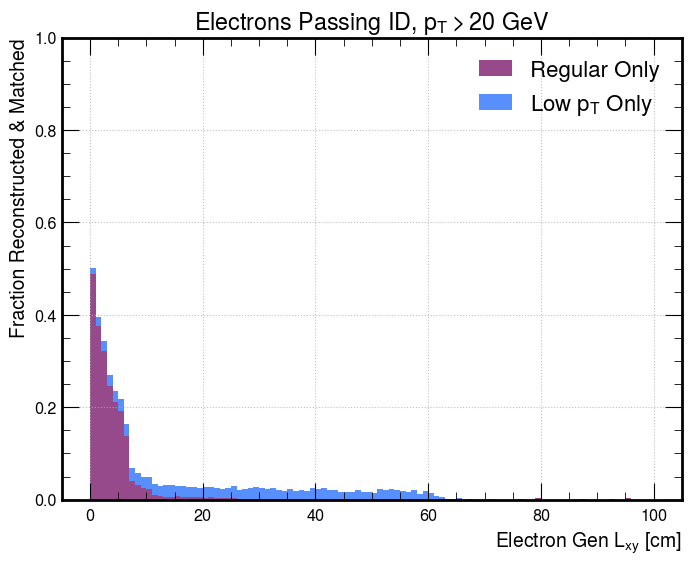

In [41]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo::sum,lxylo:lxyhi]
hg = hg[ptlo::sum,lxylo:lxyhi]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, $p_T > {ptlo.imag:.0f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_lxy_pt20toInf_passID.pdf")

## $p_T$ eff in $\Delta R$ bins

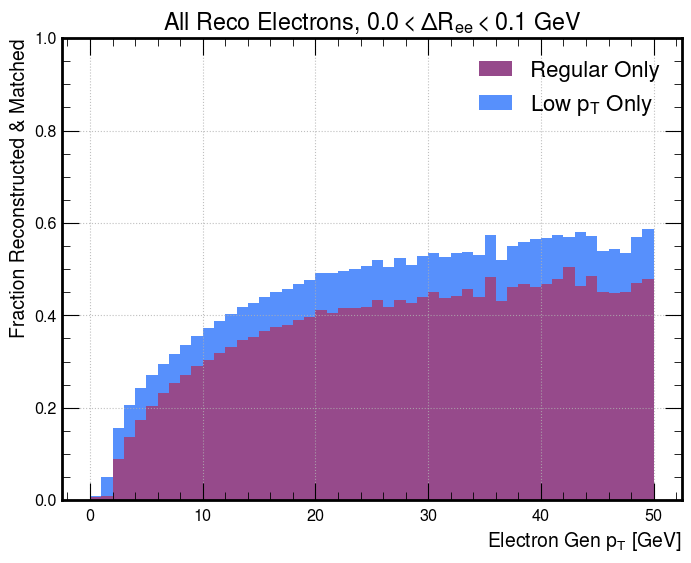

In [42]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 0j
drhi = 0.1j

hm = hm[:,ptlo:pthi,drlo:drhi:sum]
hg = hg[ptlo:pthi,drlo:drhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${drlo.imag:.1f} < \Delta R_{{ee}} < {drhi.imag:.1f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_dR0to0.1.pdf")

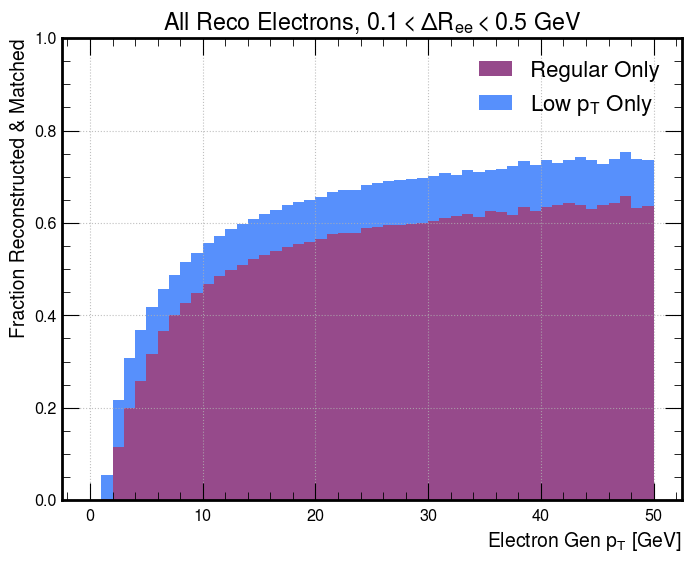

In [43]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 0.1j
drhi = 0.5j

hm = hm[:,ptlo:pthi,drlo:drhi:sum]
hg = hg[ptlo:pthi,drlo:drhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${drlo.imag:.1f} < \Delta R_{{ee}} < {drhi.imag:.1f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_dR0.1to0.5.pdf")

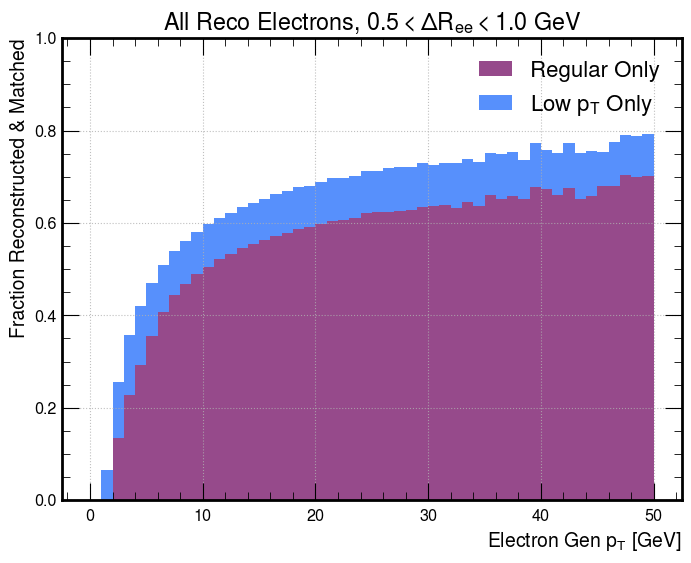

In [44]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 0.5j
drhi = 1.0j

hm = hm[:,ptlo:pthi,drlo:drhi:sum]
hg = hg[ptlo:pthi,drlo:drhi:sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${drlo.imag:.1f} < \Delta R_{{ee}} < {drhi.imag:.1f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_dR0.5to1.0.pdf")

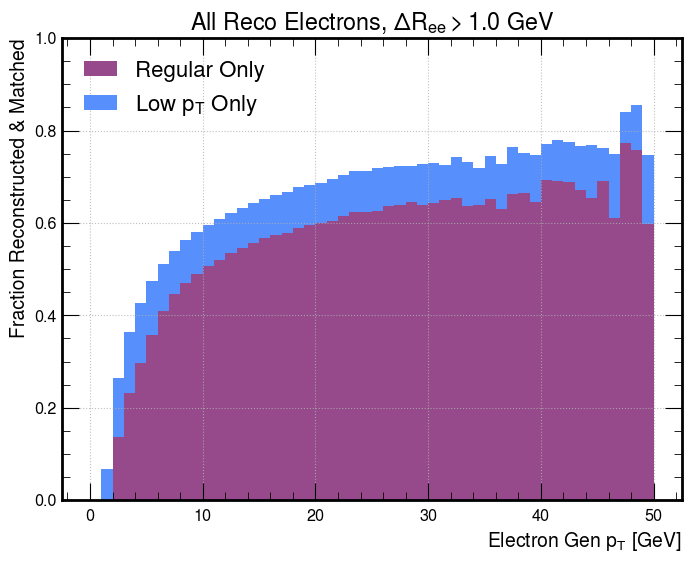

In [45]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 1.0j

hm = hm[:,ptlo:pthi,drlo::sum]
hg = hg[ptlo:pthi,drlo::sum]

mtypes = ["R","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $\Delta R_{{ee}} > {drlo.imag:.1f}$ GeV")

plt.savefig(f"{outD}/allSamples_recoEff_by_pt_dR1.0toInf.pdf")

## 2D $p_T$ vs $L_{xy}$

/tmp/ipykernel_16615/735781762.py:6: RuntimeWarning: invalid value encountered in divide
  eff = num_reco/num_gen


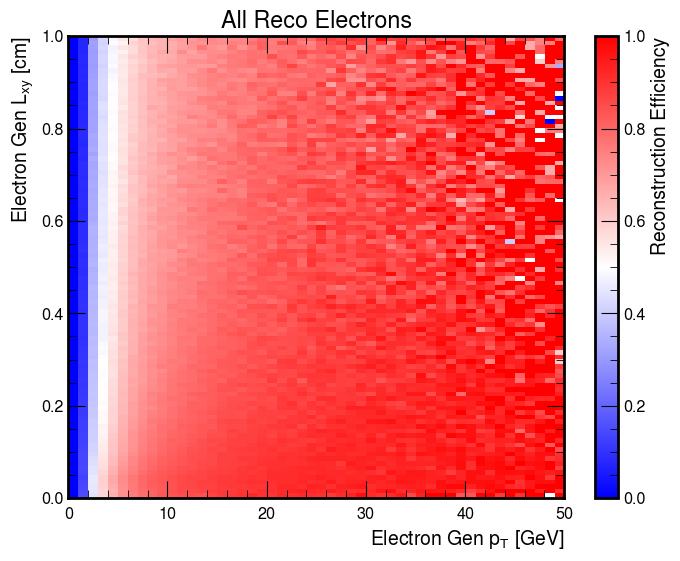

In [46]:
hm = histos.load("match_ele_gen_pt_vs_vxy1")[{"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}]
hg = histos.load("gen_ele_pt_vs_vxy1")[{"cut":'no_presel','samp':sum}]

num_gen = hg.values()
num_reco = hm.values()
eff = num_reco/num_gen
binsx,binsy = hg.axes[0].edges, hg.axes[1].edges
extent = [binsx[0],binsx[-1],binsy[0],binsy[-1]]

plt.figure(figsize=(8,6))
plt.imshow(eff.T,origin='lower',extent=extent,aspect='auto',cmap='bwr')

plt.ylabel(r"Electron Gen $L_{xy}$ [cm]")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.title(rf"All Reco Electrons")
plt.colorbar(label='Reconstruction Efficiency')

plt.savefig(f"{outD}/allSamples_recoEff_2d_pt_vs_vxy1.pdf")

/tmp/ipykernel_16615/1149632809.py:6: RuntimeWarning: invalid value encountered in divide
  eff = num_reco/num_gen


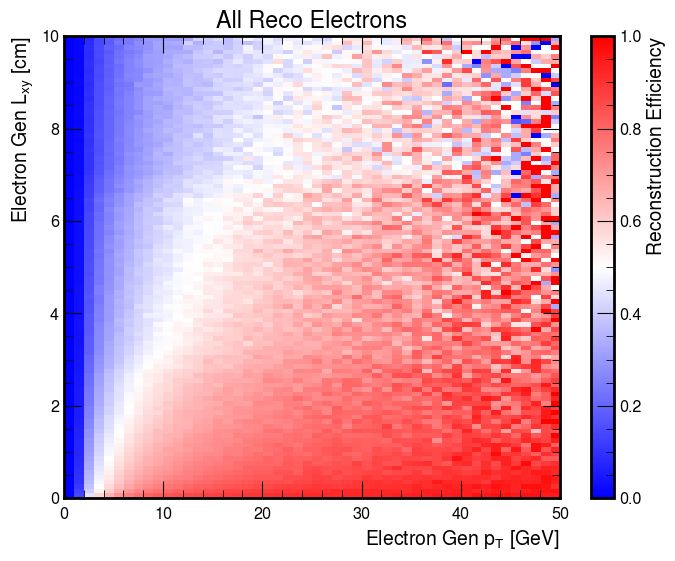

In [47]:
hm = histos.load("match_ele_gen_pt_vs_vxy10")[{"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}]
hg = histos.load("gen_ele_pt_vs_vxy10")[{"cut":'no_presel','samp':sum}]

num_gen = hg.values()
num_reco = hm.values()
eff = num_reco/num_gen
binsx,binsy = hg.axes[0].edges, hg.axes[1].edges
extent = [binsx[0],binsx[-1],binsy[0],binsy[-1]]

plt.figure(figsize=(8,6))
plt.imshow(eff.T,origin='lower',extent=extent,aspect='auto',cmap='bwr')

plt.ylabel(r"Electron Gen $L_{xy}$ [cm]")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.title(rf"All Reco Electrons")
plt.colorbar(label='Reconstruction Efficiency')

plt.savefig(f"{outD}/allSamples_recoEff_2d_pt_vs_vxy10.pdf")

/tmp/ipykernel_16615/3197369508.py:6: RuntimeWarning: invalid value encountered in divide
  eff = num_reco/num_gen


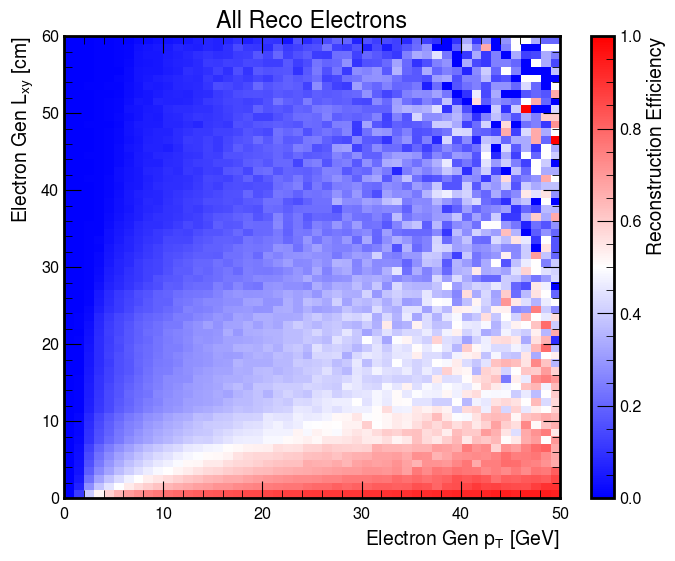

In [48]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}][:,:60j]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}][:,:60j]

num_gen = hg.values()
num_reco = hm.values()
eff = num_reco/num_gen
binsx,binsy = hg.axes[0].edges, hg.axes[1].edges
extent = [binsx[0],binsx[-1],binsy[0],binsy[-1]]

plt.figure(figsize=(8,6))
plt.imshow(eff.T,origin='lower',extent=extent,aspect='auto',cmap='bwr')

plt.ylabel(r"Electron Gen $L_{xy}$ [cm]")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.title(rf"All Reco Electrons")
plt.colorbar(label='Reconstruction Efficiency')

plt.savefig(f"{outD}/allSamples_recoEff_2d_pt_vs_vxy100.pdf")

# Gen-matched electron variable plots

In [27]:
outD = "plots_noXcleanInfo/match_ele_kinematics/"
os.makedirs(outD,exist_ok=True)

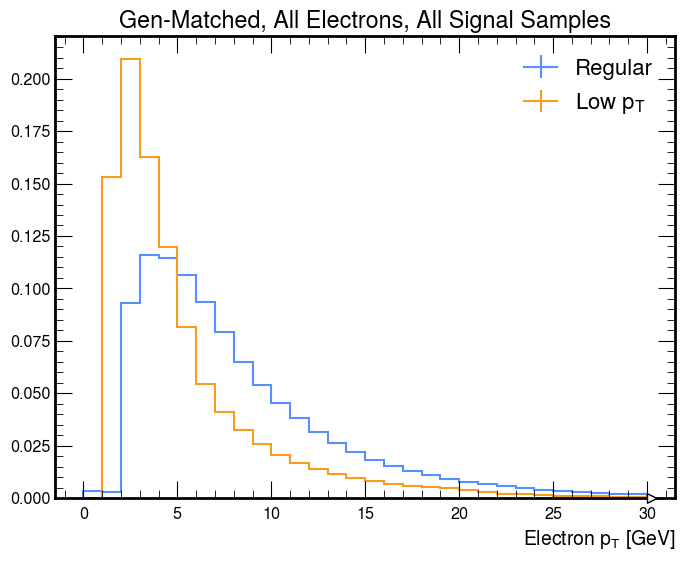

In [28]:
h = histos.load('match_ele_pt')[{"samp":sum,'cut':'no_presel','passID':sum}][:,:30j]
plt.figure(figsize=(8,6))
hs = [h[{"match_type":"R"}],h[{"match_type":"L"}]]
hep.histplot(hs,label=['Regular',r'Low $p_T$'],ax=plt.gca(),stack=False,density=True)
plt.legend(fontsize=16)
plt.xlabel("Electron $p_T$ [GeV]")
plt.title("Gen-Matched, All Electrons, All Signal Samples")
plt.savefig(f"{outD}/match_ele_pt_noXcleanVars.pdf")

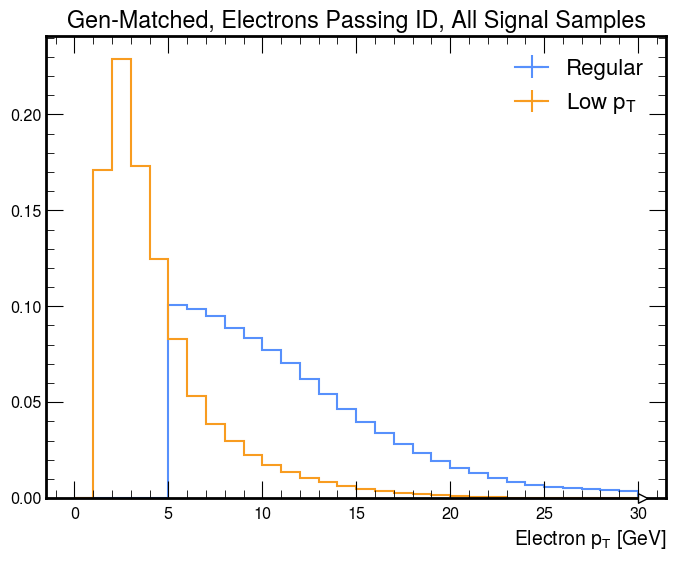

In [26]:
h = histos.load('match_ele_pt')[{"samp":sum,'cut':'no_presel','passID':1}][:,:30j]
plt.figure(figsize=(8,6))
hs = [h[{"match_type":"R"}],h[{"match_type":"L"}]]
hep.histplot(hs,label=['Regular',r'Low $p_T$'],ax=plt.gca(),stack=False,density=True)
plt.legend(fontsize=16)
plt.xlabel("Electron $p_T$ [GeV]")
plt.title("Gen-Matched, Electrons Passing ID, All Signal Samples")
plt.savefig(f"{outD}/match_ele_pt_passID_noXcleanVars.pdf")